In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse.linalg as ln
import scipy.sparse as sp

### Modèle simple
On suppose que $u(x,t)$ est la taille de la population au point $x\in \mathbb R$ à l'instant $t$. Dans la première partie, on omet provisoirerement les variations en espace et que le nombre de naissance, comme nombre de décès, est proportionnel à la taille $u(t)$ avec un taux fixe, on obtent donc l'équation 
$$\frac{du(t)}{dt}=\alpha u(t), \alpha \in \mathbb R.$$
Il semble réaliste d'envisager que les taux dépendent de la taile de la population. En effet, plus la taille de la population augmente, plus son taux de natalité diminue et son taux de mortalité augmente, on peut alors proposer le nouveau modéle suivant
$$\frac{du(t)}{dt}=\alpha u(t)\left(1-\frac{u(t)}{\kappa} \right), \alpha \in \mathbb R.$$
On considère le problème avec la condition initiale $u(0)=u_0\in (0,\kappa)$ et les paramètres $\alpha=\kappa=1.$

On notera que le modèle 
$$\frac{du(t)}{dt}=\alpha u(t)\left(1-\frac{u(t)^2}{\kappa^2} \right), \alpha \in \mathbb R$$
garantit le même type de comportement.

In [27]:
#Fonctions $g$ et la solution
def g1(t,u):
    return u 
def g2(t,u):
    return u*(1-u)
def g3(t,u):
    return u*(1-u**2)

Méthode d'Euler explicite
$$\begin{cases}
    u_0&=u(0)\\
    u_{n+1}&=u_n+hg(t_n,u_n)
   \end{cases}$$


In [28]:
# Méthode d'Euler
def euler(F, N, T, y0):
    h=T/N
    t=np.linspace(0,T,N+1)
    d=np.array(y0).size
    res=np.zeros((N+1,d))
    res[0,:]=y0
    for i in range(N):
        res[i+1,:]=res[i,:]+h*F(t[i], res[i,:])
    return res

In [29]:
T=10
N=100
t=np.linspace(0,10,N+1)
t1=np.linspace(0,2,N+1)

In [30]:
#Simulation
res1=euler(g1, N, 2.5, 0.1)
res2=euler(g2, N, T, 0.1)
res3=euler(g3, N, T, 0.1)

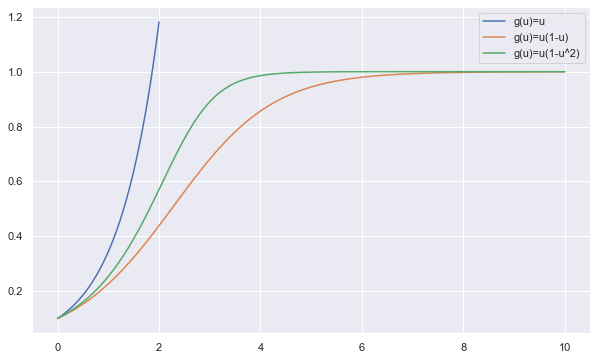

In [31]:
sns.set()
plt.figure(figsize=(10,6))
plt.plot(t1, res1, label='g(u)=u')
plt.plot(t, res2, label='g(u)=u(1-u)')
plt.plot(t, res3, label='g(u)=u(1-u^2)')
plt.legend()

### Evolution d'une population
Maintenant, on prend en compte la variation spatiale de la population $u(x,t)$ et modélise ce mouvement de population dans l'espace par une loi de diffusion et on superpose cet effet à l'évolution en temps due aux naissances et aux décès. Cela conduit à considérer l'équation suivante
$$\frac{\partial u(x,t)}{\partial t}=\alpha\frac{\partial^2 u(x,t)}{\partial x^2}+g(u(x,t)),$$
avec la condition initiale 
$$u(x,0)=u_0(x),$$
et les conditions aux bornes
$$\frac{\partial u}{\partial x}(-L,t)=\frac{\partial u}{\partial x}(L,t)=0, $$
ça veut dire qu'on considére que la population vit sur un espace borné de la forme $\left[-L,L\right]$ et que la population est isolée.

#### Solutions explicites
On considère le modèle avec $\alpha=1$ et$g(u)=u(1-u^2)$ et que l'espace n'est pas borné, alors la solution exacte est donné par 
$$u(x,t)=\frac{1}{2}+\frac{1}{2}\tanh \left(\frac{1}{2\sqrt{2}}\left(x+\frac{3}{\sqrt{2}}t\right)\right)$$

In [32]:
def sol(x,t):
    return 1/2+1/2*np.tanh(1/2*np.sqrt(2)*(x+t*3/np.sqrt(2)))    

#### Schéma numérique
On donne une subdivision de les intervalles $\left[-L,L\right]$ par $x_j=-L+(j-1)\frac{2L}{J-1}$ et $\left[0,T\right]$ par $t_n=n\frac{T}{N}$. On va approcher $u(x_j,t_n)$ par $u_j^n$, qui est définit par
\begin{align}
&\frac{u_j^{n+1}-u_j^n}{\tau}=\alpha\frac{u_{j+1}^{n+1}-2u_j^{n+1}+u_{j-1}^{n+1}}{h^2}+g(u_j^n)\\
&u_0^{n+1}=u_1^{n+1}, u_{J+1}^{n+1}=u_J^{n+1}\\
&u_j^0=u_0(x_j)
\end{align}
Ce système récrit sous la forme de matrice
$$MU^{n+1}=U^n+\tau G^n,$$
où $U^n=(u_j^n)_j$ et $G^n=(g(u_j^n)_j$.

In [33]:
#Matrice M
coef=tau/(h**2)
diag1=np.ones(J)
data1=(1+2*coef)*diag1
data1[0]=1+coef
data1[-1]=1+coef
data=np.array([data1, -coef*diag1, -coef*diag1])
diags=np.array([0,1,-1])
M=sp.spdiags(data, diags, J,J ).toarray()

In [34]:
#Schéma numérique
def simul(fonc, init, Time):
    N=int(Time/tau)
    res=np.zeros([N,J])
    res[0,:]=init(x_0)
    for i in range(N-1):
        res[i+1,:]=np.linalg.solve(M, res[i,:]+tau*fonc(Time,res[i,:]))
    return res    

#### 1er cas:  $g=u(1-u^2)$ et $u_0(x)=sol(x,0)$.

In [35]:
#Parametres
J=50
L=40
tau=0.01
h=2*L/(J-1)
#poin initial
x_0=np.linspace(-L,L,J)

In [36]:
#Fonction initiale
def init1(x):
    return sol(x,0)

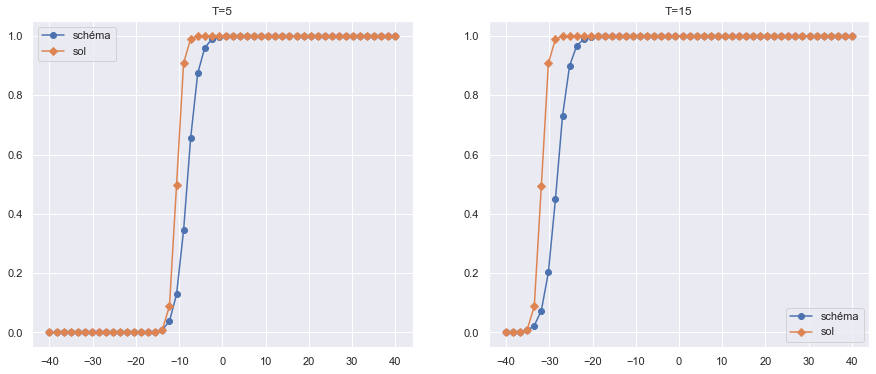

In [37]:
#############
res1=simul(g3, init1, 5)
res2=simul(g3, init1, 15)
############
sns.set()
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(x_0, res1[-1,:], 'o-', label='schéma')
plt.plot(x_0, sol(x_0, 5), 'D-', label='sol')   
plt.title('T=5')
plt.legend()
############
plt.subplot(1,2,2)
plt.plot(x_0, res2[-1,:],'o-', label='schéma')
plt.plot(x_0, sol(x_0, 15), 'D-',label='sol')   
plt.title('T=15')
plt.legend()

#### 2 ème cas:  $𝑢_0(𝑥)=init2(𝑥,0)$.
On considère maintenant la condition initiale
$$u_0(x)=\begin{cases}
0.8\cos \left(\frac{\pi x}{20}\right)&\text{ si }\|x\|\leq 10\\
0  &\text{ si non}
\end{cases}$$

In [38]:
#Fonction initiale
def v_abs(x):
    if np.abs(x)<=10:
        return 0.8*np.cos(x*np.pi/20)
    else:
        return 0
def init2(x):
    return np.array([v_abs(xi) for xi in x])

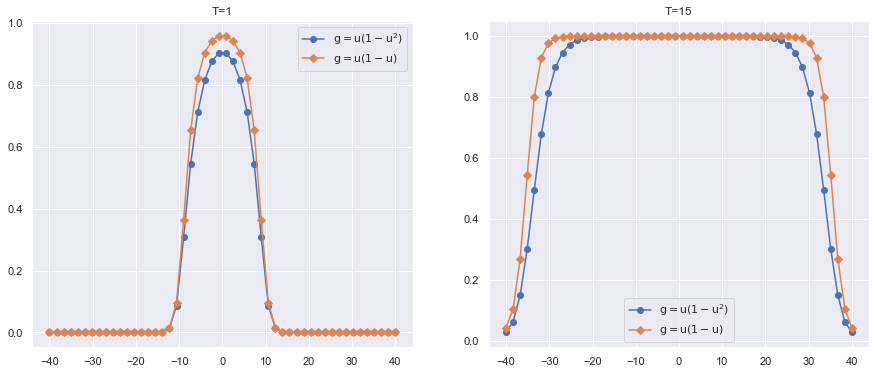

In [39]:
#T=1
res3=simul(g2, init2, 1)
res4=simul(g3, init2, 1)
###########
sns.set()
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(x_0, res3[-1,:], 'o-', label='$g=u(1-u^2)$')
plt.plot(x_0, res4[-1,:], 'D-',label='$g=u(1-u)$')   
plt.title('T=1')
plt.legend()
###########
#T=15
res5=simul(g2, init2, 15)
res6=simul(g3, init2, 15)
##############
plt.subplot(1,2,2)
plt.plot(x_0, res5[-1,:], 'o-', label='$g=u(1-u^2)$')
plt.plot(x_0, res6[-1,:], 'D-', label='$g=u(1-u)$')   
plt.title('T=15')
plt.legend()